In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y=digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)


In [13]:
from sklearn.linear_model import LogisticRegression

lor_reg = LogisticRegression()

In [14]:
lor_reg.fit(X_train,y_train)
y_predict = lor_reg.predict(X_test)

c:\programdata\anaconda3\envs\zyc\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.metrics import f1_score

f1_score(y_test,y_predict)


0.8674698795180723

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predict)


array([[403,   2],
       [  9,  36]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score

precision_score(y_test,y_predict)

0.9473684210526315

In [18]:
from sklearn.metrics import recall_score

recall_score(y_test,y_predict)

0.8

In [19]:
lor_reg.decision_function(X_test)


array([-21.39854362, -32.89732861, -16.41806543, -79.82324711,
       -48.03301319, -24.1825065 , -44.61001539, -24.24470013,
        -1.14286376, -19.00460513, -65.82299987, -50.9707066 ,
       -30.92073612, -45.94866867, -37.36152112, -29.51341023,
       -36.92851844, -82.80981004, -37.63662308,  -9.87876314,
        -9.26812633, -85.25163727, -16.75034146, -45.34427689,
        -5.02565026, -48.29807287, -11.65878414, -37.36063122,
       -25.08299722, -13.59761546, -16.59531872, -28.7859973 ,
       -34.36790583, -28.52336238,  -8.11461317,  -4.60241698,
       -21.94218483, -21.87785805, -31.17528817, -23.36482534,
       -26.90558935, -62.23613637, -37.6869895 , -66.36558822,
       -20.10369518, -16.68540499, -18.16732516, -21.54926747,
       -28.96548357, -19.61414667,   2.41254155,   7.72933988,
       -34.87166204, -42.70949406, -25.632425  , -34.75120137,
        -7.59780389, -49.51341444, -51.52646985,  19.66207067,
       -10.09740962, -32.00616175, -11.4993307 ,  -1.42

In [20]:
lor_reg.decision_function(X_test)[:10]


array([-21.39854362, -32.89732861, -16.41806543, -79.82324711,
       -48.03301319, -24.1825065 , -44.61001539, -24.24470013,
        -1.14286376, -19.00460513])

In [21]:
lor_reg.predict(X_test)[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
decision_scores = lor_reg.decision_function(X_test)


In [23]:
np.min(decision_scores)

-85.72834819853409

In [24]:
np.max(decision_scores)

19.899135882295568

In [25]:
y_predict2 = np.array(decision_scores >= 5,dtype='int')


In [26]:
confusion_matrix(y_test,y_predict2)


array([[404,   1],
       [ 21,  24]], dtype=int64)

In [27]:
precision_score(y_test,y_predict2)


0.96

In [28]:
recall_score(y_test,y_predict2)

0.5333333333333333

In [29]:
precisions = []
recalls = []
thresholds=np.arange(np.min(decision_scores),np.max(decision_scores),0.1)
for threshold in thresholds:
    y_predict =np.array(decision_scores >= threshold,dtype='int')
    precisions.append(precision_score(y_test,y_predict))
    recalls.append(recall_score(y_test,y_predict))

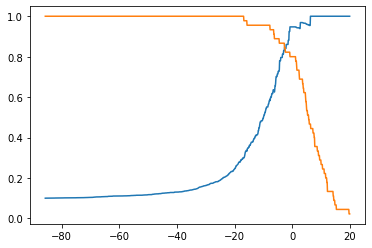

In [30]:
plt.plot(thresholds,precisions)
plt.plot(thresholds,recalls)


### Precision-Recall 曲线



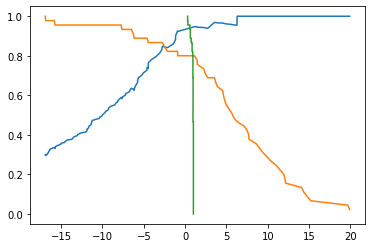

In [39]:

plt.plot(precisions,recalls)

### scikit-learn 中的Precision-Recall曲线



In [35]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

In [36]:
precisions.shape


(151,)

In [37]:
recalls.shape


(151,)

In [38]:
thresholds.shape


(150,)

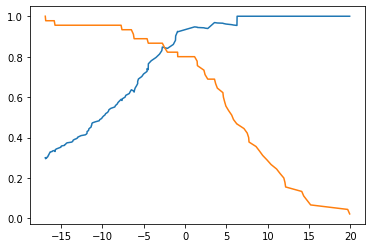

In [40]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])

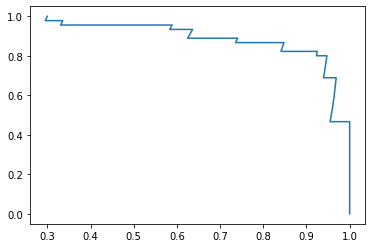

In [41]:
plt.plot(precisions,recalls)
